--- 
# 농구선수의 게임 데이터 활용 포지션 예측을 위한 데이터 정제

### 문제정의 
NBA 농구 선수들의 게임 기록을 데이터로 사용해 특정 농구 선수의 포지션을 예측 

### 데이터 획득 & 살펴보기 

In [3]:
# 불러오기 
import pandas as pd 
df = pd.read_csv("../Data/basketball.csv")
df.head()


,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


- Player : 선수이름     
- Position : 포지션 (SG : Shooting Guard, C : Center)
- ** 포지션별 내용     
&nbsp;&nbsp;&nbsp;C : 골대, 포스트 근처에서 슛을 블로킹, 리바운드하며 바깥으로 쳐내 골대 근처에서 2점슛 득점 한다 (키 큼)    
&nbsp;&nbsp;&nbsp;SG : 코트 내에서 3점슛 등 장거리 슈팅으로 점수 얻는 역할 (키 작음)
- 3P : 한 경기당 평균 3점슛 성공 횟수     
- 2P : 한 경기당 평균 2점슛 성공 횟수 
- TRB : 한 경기당 평균 리바운드 성공 횟수 
- AST : 한 경기당 평균 어시스트 성공 횟수 
- STL : 한 경기당 평균 스틸 성공 횟수 
- BLK : 한 경기당 평균 플로킹 성공 횟수 

In [4]:
# 포지션의 종류와 갯수 파악 
df.Pos.value_counts()
# df.Pos.unique() : 종류만 파악 

SG    50
C     50
Name: Pos, dtype: int64

### 시각화 
데이터 특징을 바탕으로 한 공간에 시각화함으로써 머신러닝에 필요한 컬럼 / 아닌 컬럼을 쉽게 구분    
-> 피쳐컬럼을 찾기 위함!!! 

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


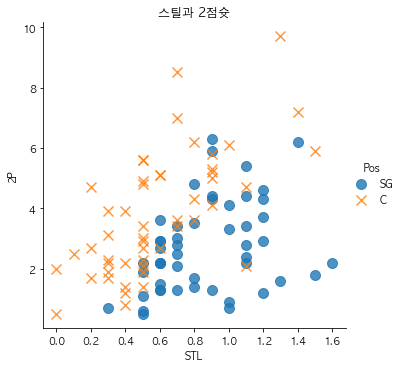

In [7]:
# 스틸, 2점슛 데이터 시각화 
sns.lmplot(

    'STL',
    '2P',
    data=df,
    fit_reg=False,
    markers = ['o','x'],
    scatter_kws={'s':100}, #좌표상의 점의 크기
    hue='Pos', #대상값

)
plt.title('스틸과 2점슛')
plt.show()

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


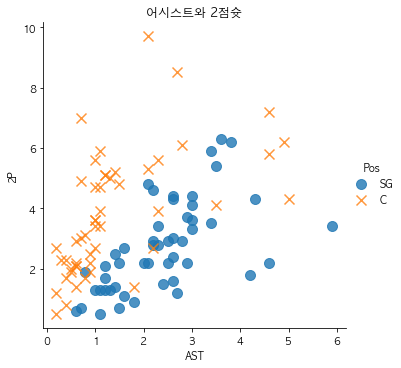

In [8]:
# 어시스트, 2점슛 데이터 시각화 
sns.lmplot(

    'AST',
    '2P',
    data=df,
    fit_reg=False,
    markers = ['o','x'],
    scatter_kws={'s':100}, #좌표상의 점의 크기
    hue='Pos', #대상값

)
plt.title('어시스트와 2점슛')
plt.show()


> 2점슛, 어시스트, 스틸 속성으로 데이터 분포 확인했을 때, 슈팅가드와 센터의 경계가 매우 근접해서 분류하기에 모호하다 
> 다른 속성들을 확인해봐야 한다     
> 3점슛 볼 건데, 3점슛 쏘는 애들 보통 블로킹과 리바운드랑 관련된 포지션이라서 이렇게 나눔. 정식으로는 두개씩 묶어서 다 해봐야 함. 시간 상 이렇게 나누는 걸로! 

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


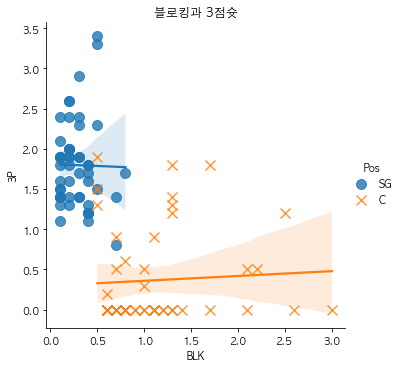

In [9]:
# 블로킹과 3점슛 
sns.lmplot(

    'BLK',
    '3P',
    data=df,
    fit_reg=True,
    markers = ['o','x'],
    scatter_kws={'s':100}, #좌표상의 점의 크기
    hue='Pos', #대상값

)
plt.title('블로킹과 3점슛')
plt.show()


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


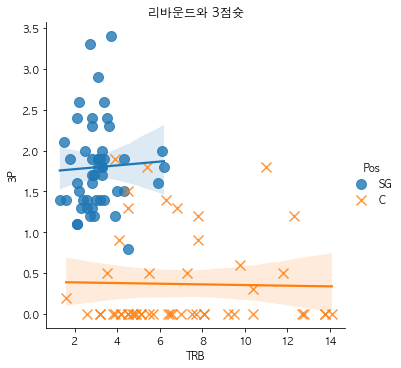

In [10]:
# 리바운드, 3점슛 시각화 
sns.lmplot(

    'TRB',
    '3P',
    data=df,
    fit_reg=True,
    markers = ['o','x'],
    scatter_kws={'s':100}, #좌표상의 점의 크기
    hue='Pos', #대상값

)
plt.title('리바운드와 3점슛')
plt.show()


> 분포상으로 볼 때 몇몇 데이터를 제거하면 구분이 되는 것으로 보임.    
> 회귀선을 그려보니 각각의 회귀선이 직선으로 되어 있음. 서로 만나지 않는다는 거니까 둘이 분리가 된다는 걸 의미함.
> 이렇게 산포도에 회귀선도 같이 그릴 수 있어서 seaborn 사용  

> 동일한 클래스는 서로 근접해 있고, 다른 클래스와는 멀리 떨어져 있음    
> 시각화 결과에서 데이터 구분이 확실할 경우, 선택된 속성(피처)들이 머신러닝 정확도에 큰 도움됨     

### 데이터 다듬기 
분별력이 없는 특징(feature column)을 데이터에서 제거하기     
시각화 결과, 2P, AST, STL은 분별력이 없다는 것을 확인 -> 제거하기로 한다     

In [11]:
# 분별력 없는 Feature Column 삭제하기 
df.drop(["2P",'AST','STL'], axis=1, inplace=True)
df.head()


,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [12]:
# 학습데이터 / 검증데이터 나누기 
from sklearn.model_selection import train_test_split 
train, test = train_test_split(df, test_size=0.2) # 20퍼센트를 테스트로 분류합니다. 

In [13]:
train.shape

(80, 5)

In [14]:
test.shape

(20, 5)

In [15]:
# 데이터 저장하기 
train.to_csv("../Data/basketball_train.csv", index=False)
test.to_csv("../Data/basketball_test.csv", index=False)

---